# Bike Sharing Dataset Decision Tree Regressor

### Obbiettivo
L'obbiettivo che ci poniamo è quello di prevedere il numero di biciclette che verranno noleggiate

## Importo librerie

In [1]:
%matplotlib inline

# data manuipulation
import numpy as np
import pandas as pd

# modeling utilities
import pydotplus 
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


# plotting libraries
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sn


sn.set_style('whitegrid')
sn.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

## Carico Dataset

In [2]:
hour_df = pd.read_csv('hour.csv')
#fonte (https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

print("Shape of dataset::{}".format(hour_df.shape))

Shape of dataset::(17379, 17)


## Preprocessing
+ Standardizzo nome delle colonne
+ Typecast attributi
+ Encode Categoricals usando One Hot Encoding

### Standardizzo nome colonne

In [3]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

## Typecast degli Attributi

In [4]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')

## Divisione Train-Test

In [5]:
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3], hour_df.iloc[:,-1], 
                                                    test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


In [6]:
all_features =  ['temp','humidity','windspeed','hour','weekday',
                'month','year','season','is_holiday','weather_condition','is_workingday']

In [7]:
X= pd.get_dummies(X[all_features])
X

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.64,0.65,0.1940,0,5,9,0,0,0,1,0,1,0,1,0,0,0,0,1
1,0.50,0.45,0.2239,13,2,3,0,0,1,0,0,1,0,1,0,0,0,0,1
2,0.86,0.47,0.5224,12,0,8,1,0,0,1,0,1,0,1,0,0,0,1,0
3,0.30,0.61,0.0000,2,3,2,1,1,0,0,0,1,0,1,0,0,0,0,1
4,0.54,0.19,0.4179,17,6,4,1,0,1,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11638,0.46,0.88,0.0896,9,5,4,1,0,1,0,0,1,0,1,0,0,0,0,1
11639,0.66,0.34,0.1343,17,5,5,1,0,1,0,0,1,0,1,0,0,0,0,1
11640,0.80,0.43,0.2836,12,3,8,0,0,0,1,0,1,0,1,0,0,0,0,1
11641,0.24,0.65,0.4179,7,2,2,0,1,0,0,0,1,0,1,0,0,0,0,1


## Decision Tree Regression

In [8]:
y= y.total_count.values.reshape(-1,1)

In [9]:
X.shape,y.shape

((11643, 19), (11643, 1))

## Sample di Decision Tree Regressor

In [10]:
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)
dtr.fit(X,y)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [11]:
dtr.score(X,y)

0.5645919317952333

### Plot del modello

In [12]:
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("bikeshare.pdf")

True

### Grid Search Cross Validation

In [13]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
              }

In [14]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [15]:
grid_cv_dtr.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100, 500, 800],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

### Cross Validation: Dettagli del modello migliore

In [16]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.8333284746008405
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 500, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [17]:
df = pd.DataFrame(data=grid_cv_dtr.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019582,0.000776,0.002918,0.002618,mse,2,5,20,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
1,0.018524,0.002245,0.003200,0.003065,mse,2,5,20,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
2,0.016092,0.004229,0.004024,0.004220,mse,2,5,20,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
3,0.019054,0.004626,0.004623,0.005299,mse,2,5,40,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
4,0.014984,0.004169,0.004425,0.003889,mse,2,5,40,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

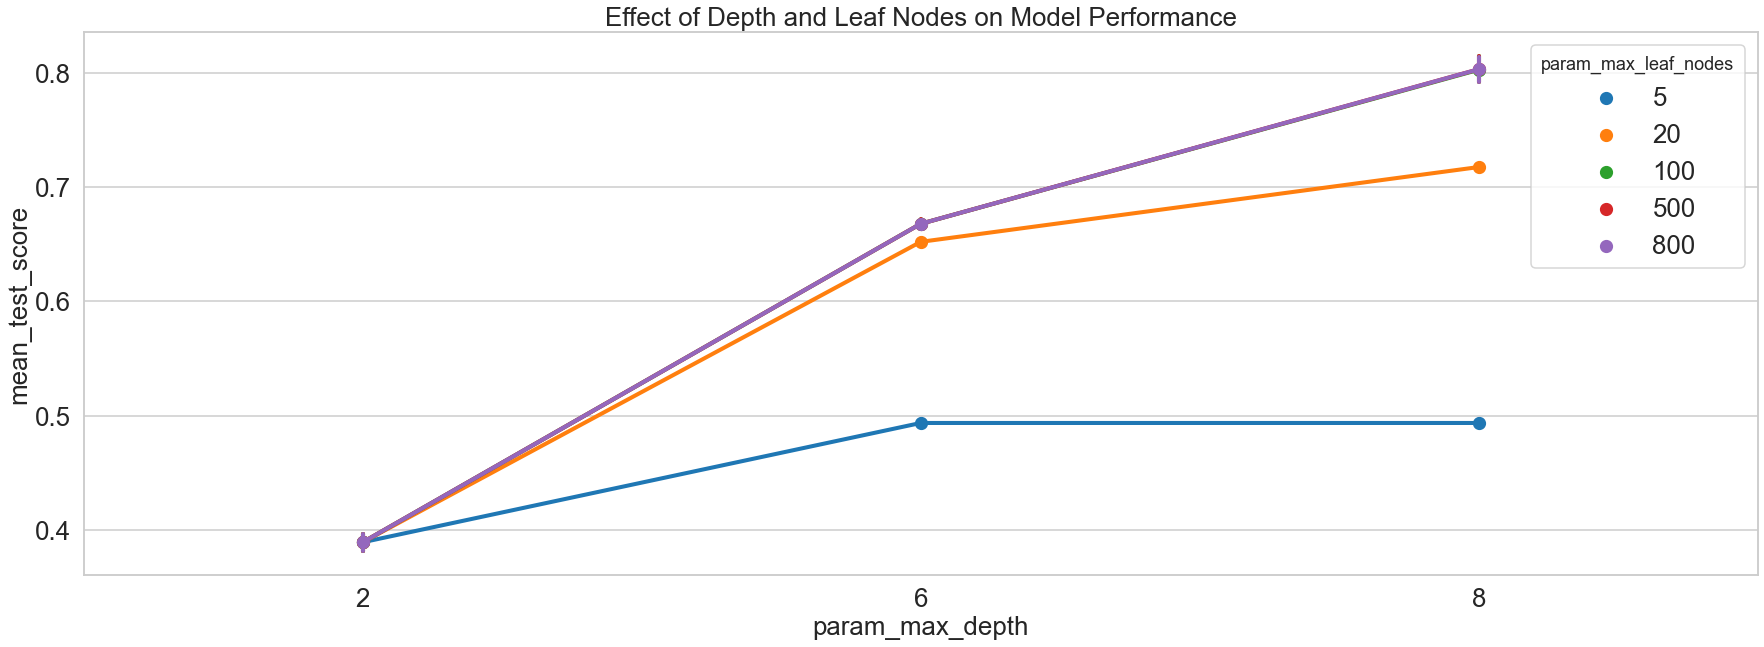

In [18]:
fig,ax = plt.subplots()
sn.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

### Residual Plot

In [19]:
predicted = grid_cv_dtr.best_estimator_.predict(X)
residuals = y.flatten()-predicted

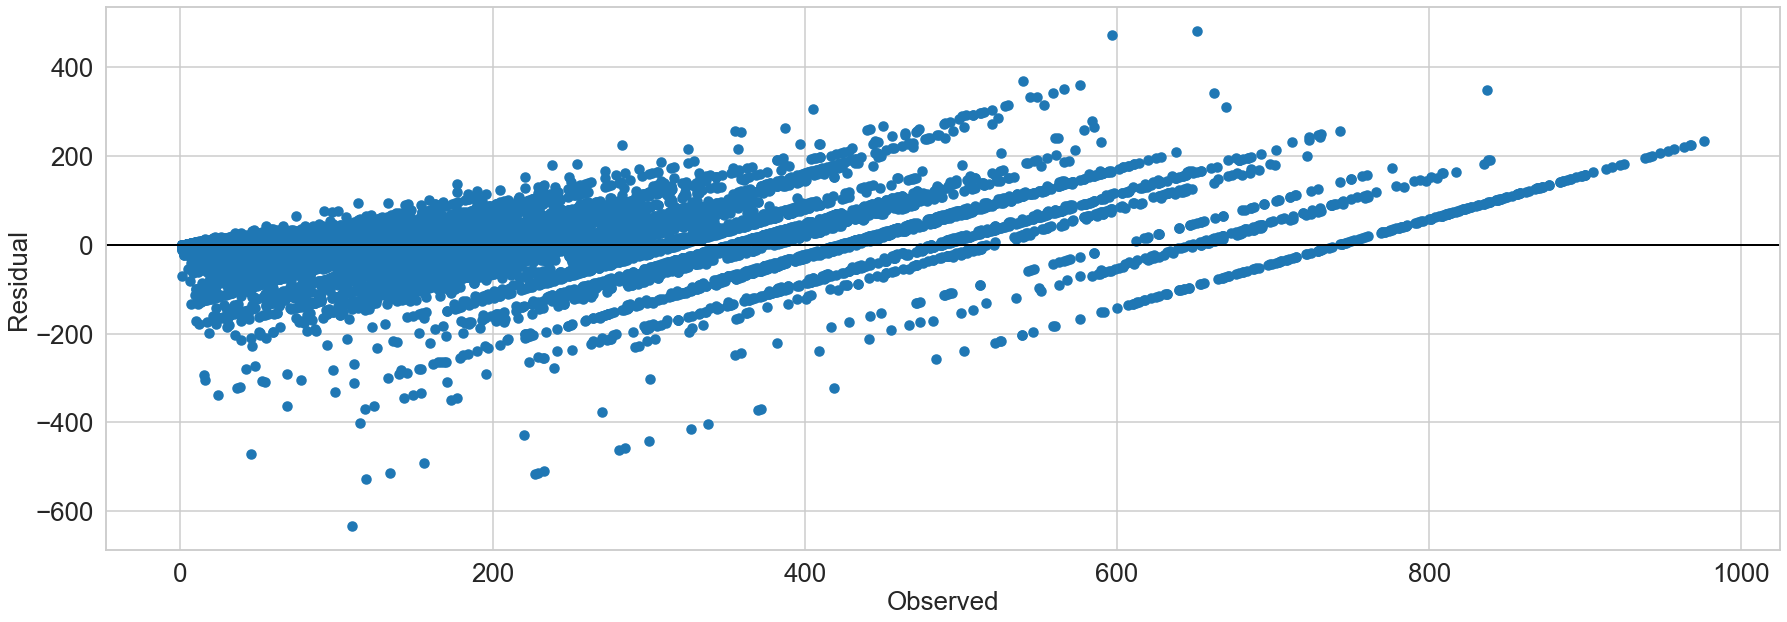

In [20]:
fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [21]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

In [22]:
print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))

avg R-squared::0.8375948069484194
MSE::-5406.524080066271


### Imposto il modello per il test

In [23]:
best_dtr_model = grid_cv_dtr.best_estimator_

## Test Dataset Performance

In [24]:
X_test = pd.get_dummies(X_test[all_features])
X_test

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.80,0.27,0.1940,19,6,6,1,0,0,1,0,1,0,1,0,0,0,1,0
1,0.24,0.41,0.2239,20,1,1,1,1,0,0,0,0,1,1,0,0,0,1,0
2,0.32,0.66,0.2836,2,5,10,0,0,0,0,1,1,0,1,0,0,0,0,1
3,0.78,0.52,0.3582,19,2,5,1,0,1,0,0,1,0,1,0,0,0,0,1
4,0.26,0.56,0.3881,0,4,1,0,1,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,0.62,1.00,0.1045,10,5,9,0,0,0,0,1,1,0,0,0,1,0,0,1
5732,0.28,0.81,0.1642,7,5,12,1,0,0,0,1,1,0,0,0,1,0,0,1
5733,0.34,0.46,0.0896,14,0,2,0,1,0,0,0,1,0,1,0,0,0,1,0
5734,0.72,0.37,0.0000,16,5,10,1,0,0,0,1,1,0,1,0,0,0,0,1


In [25]:
y_test = y_test.total_count.values.reshape(-1,1)

In [26]:
y_pred = best_dtr_model.predict(X_test)
residuals = y_test.flatten() - y_pred

In [27]:
r2_score = best_dtr_model.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))
print("MAE aggiunta io interessante: %.2f"
      % metrics.mean_absolute_error(y_test, y_pred))

R-squared::0.8478415542500741
MSE: 4854.08
MAE aggiunta io interessante: 44.99


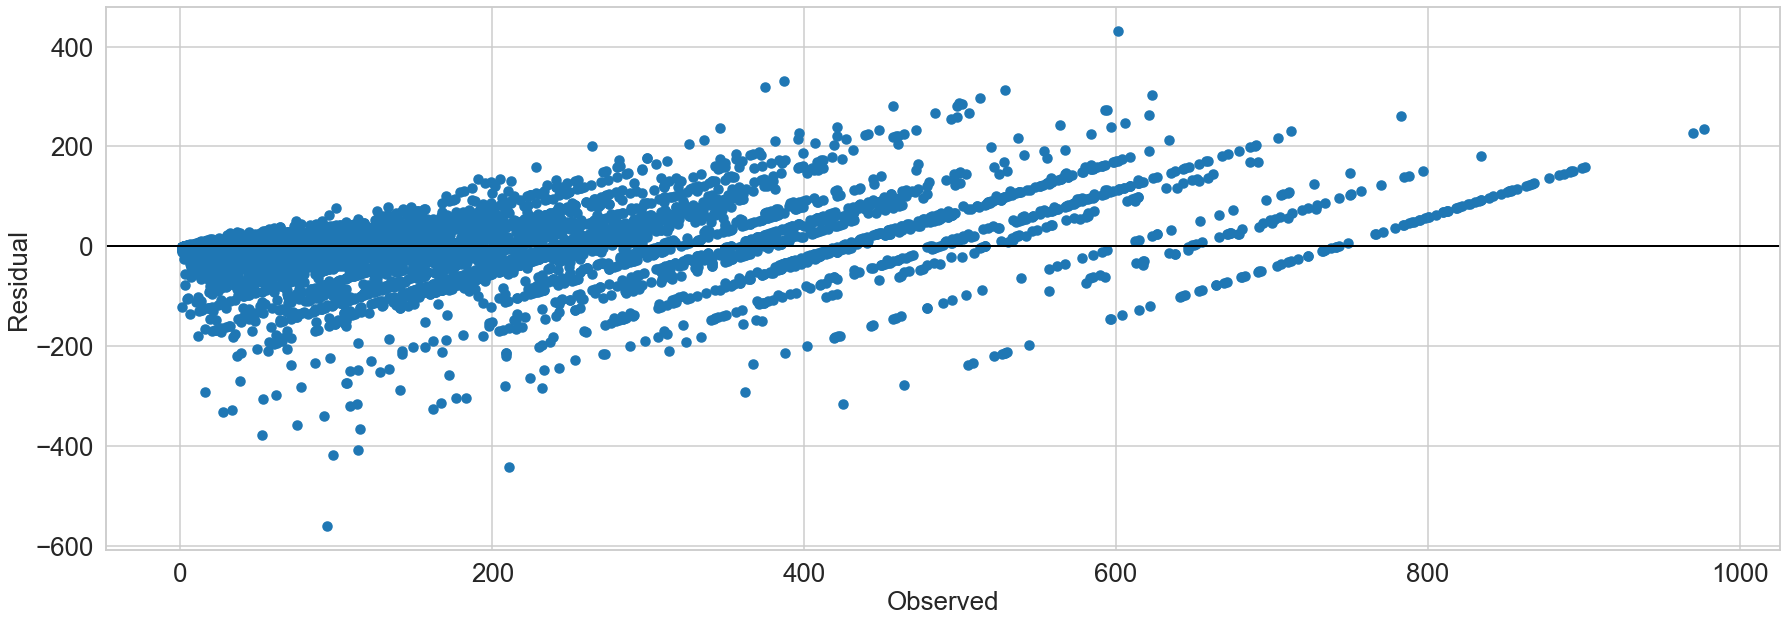

In [28]:
fig, ax = plt.subplots()
ax.scatter(y_test.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

r2_score = grid_cv_dtr.best_estimator_.score(X_test,y_test)